# Analysis of Top Liquor Sales in Iowa (Last 3 Calendar Years)

## Objective: This analysis focuses on identifying the top three cities within the top three counties in Iowa with the highest liquor sales revenue over the last three calendar years.

## Imports
### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### Import dataset

In [2]:
df = pd.read_csv('iowa_dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065657 entries, 0 to 3065656
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_number      int64  
 2   item_number       int64  
 3   city              object 
 4   county            object 
 5   order_count       int64  
 6   rev_sum           float64
 7   sales_per_order   float64
 8   cogs              float64
 9   profit            float64
 10  avg_gross_margin  float64
 11  avg_profit_ratio  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 280.7+ MB


### Summary of the dataset

In [3]:
df['store_number'] = df['store_number'].astype('str')
df['item_number'] = df['item_number'].astype('str')
df['city'] = df['city'].apply(lambda x: "LE CLAIRE" if x == "LECLAIRE" else x)

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Round floats to 2 decimal places
df.describe(include='all')

,date,store_number,item_number,city,county,order_count,rev_sum,sales_per_order,cogs,profit,avg_gross_margin,avg_profit_ratio
count,3065657,3065657,3065657,3065657,3065657,3065657.00,3065657.00,3065657.00,3065657.00,3065657.00,3065657.00,3065657.00
unique,879,664,6620,25,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-12-19,2633,64870,DES MOINES,POLK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6746,58876,27670,632337,1203935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.01,201.52,197.44,134.57,66.95,0.50,0.33
std,NaN,NaN,NaN,NaN,NaN,0.09,825.13,788.33,550.41,275.20,0.04,0.08
min,NaN,NaN,NaN,NaN,NaN,1.00,-5130.00,-5130.00,-3420.00,-2709.00,-0.96,-21.63
25%,NaN,NaN,NaN,NaN,NaN,1.00,48.12,48.00,32.49,16.00,0.50,0.33
50%,NaN,NaN,NaN,NaN,NaN,1.00,97.56,97.56,65.04,32.52,0.50,0.33
75%,NaN,NaN,NaN,NaN,NaN,1.00,180.00,180.00,120.28,60.00,0.50,0.33


In [4]:
df.head(10)

,date,store_number,item_number,city,county,order_count,rev_sum,sales_per_order,cogs,profit,avg_gross_margin,avg_profit_ratio
0,2023-12-30,10034,10802,URBANDALE,POLK,1,629.76,629.76,419.76,210.00,0.50,0.33
1,2023-12-30,10034,11788,URBANDALE,POLK,1,99.00,99.00,66.00,33.00,0.50,0.33
2,2023-12-30,10034,17086,URBANDALE,POLK,1,323.88,323.88,215.88,108.00,0.50,0.33
3,2023-12-30,10034,17956,URBANDALE,POLK,1,162.00,162.00,108.00,54.00,0.50,0.33
4,2023-12-30,10034,19476,URBANDALE,POLK,1,324.00,324.00,216.00,108.00,0.50,0.33
5,2023-12-30,10034,34433,URBANDALE,POLK,1,279.00,279.00,186.00,93.00,0.50,0.33
6,2023-12-30,10034,34456,URBANDALE,POLK,1,204.00,204.00,135.96,68.04,0.50,0.33
7,2023-12-30,10034,38075,URBANDALE,POLK,1,64.80,64.80,43.20,21.60,0.50,0.33
8,2023-12-30,10034,38178,URBANDALE,POLK,1,171.00,171.00,114.00,57.00,0.50,0.33
9,2023-12-30,10034,43285,URBANDALE,POLK,1,170.88,170.88,113.88,57.00,0.50,0.33


## Cleaning

### Checking for missing values

In [5]:
# Count rows with any missing values
missing_value_count = df[df.isna().any(axis=1)].shape[0]

### Changing `date` to dateime format for date aggregations

In [6]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

## Identifying Top Cities and Top Counties

In [7]:
# List of top 3 counties by revenue
top_3_counties_list = df[['county', 'rev_sum']].groupby('county').sum('rev_sum').sort_values('rev_sum', ascending=False).head(3).index.to_list()
top_3_counties_list

['POLK', 'LINN', 'SCOTT']

The top three counties were identified based on the total liquor sales revenue. These counties consistently exhibited the highest sales figures, indicating concentrated demand in these regions.

In [8]:
# Get top 3 cities by revenue within each of the top 3 counties
top_3_cities = (
    df[df['county'].isin(top_3_counties_list)]
    .groupby(['county', 'city'])[['rev_sum']]
    .sum()
    .sort_values(['county', 'rev_sum'], ascending=[True, False])
    .groupby('county')
    .head(3)
    .reset_index()
)

top_3_cities

,county,city,rev_sum
0,LINN,CEDAR RAPIDS,82324943.51
1,LINN,MOUNT VERNON,12283962.87
2,LINN,MARION,10636104.34
3,POLK,DES MOINES,156522022.58
4,POLK,WEST DES MOINES,36750857.30
5,POLK,ANKENY,36075600.81
6,SCOTT,DAVENPORT,62726046.18
7,SCOTT,BETTENDORF,16334208.33
8,SCOTT,ELDRIDGE,3380332.77


Within each of the top counties, the top three cities were determined based on their contribution to the county's liquor sales. This highlights the primary urban centers driving liquor sales in Iowa.

In [9]:
# Filter DataFrame for top cities
cities = top_3_cities['city'].tolist()
top_cities_counties = df[(df['city'].isin(cities))&df['county'].isin(top_3_counties_list)]
top_cities_counties.city.value_counts()

city
DES MOINES         632337
CEDAR RAPIDS       496106
DAVENPORT          309585
WEST DES MOINES    232267
ANKENY             181455
BETTENDORF          82350
MARION              77790
MOUNT VERNON        32587
ELDRIDGE            22296
Name: count, dtype: int64

## Seasonal Distribution

Sales data was categorized by season, revealing patterns in liquor sales across different times of the year. This could inform targeted marketing strategies during peak seasons.


In [10]:
def find_season(date):
    # Define the start and end dates for each season
    year = date.year
    spring_start = pd.Timestamp(year=year, month=3, day=20)
    summer_start = pd.Timestamp(year=year, month=6, day=21)
    fall_start = pd.Timestamp(year=year, month=9, day=22)
    winter_start = pd.Timestamp(year=year, month=12, day=21)

    # Check which season the date falls into
    if spring_start <= date < summer_start:
        return 'Spring'
    elif summer_start <= date < fall_start:
        return 'Summer'
    elif fall_start <= date < winter_start:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function and use .loc to assign the new column
top_cities_counties = top_cities_counties.copy()
top_cities_counties.loc[:, 'season'] = top_cities_counties['date'].apply(find_season)


In [11]:
# Extract year, weekday, and month from 'date'
top_cities_counties['year'] = top_cities_counties['date'].dt.year
top_cities_counties['weekday'] = top_cities_counties['date'].dt.day_name()
top_cities_counties['month'] = top_cities_counties['date'].dt.month_name()


## Visualization

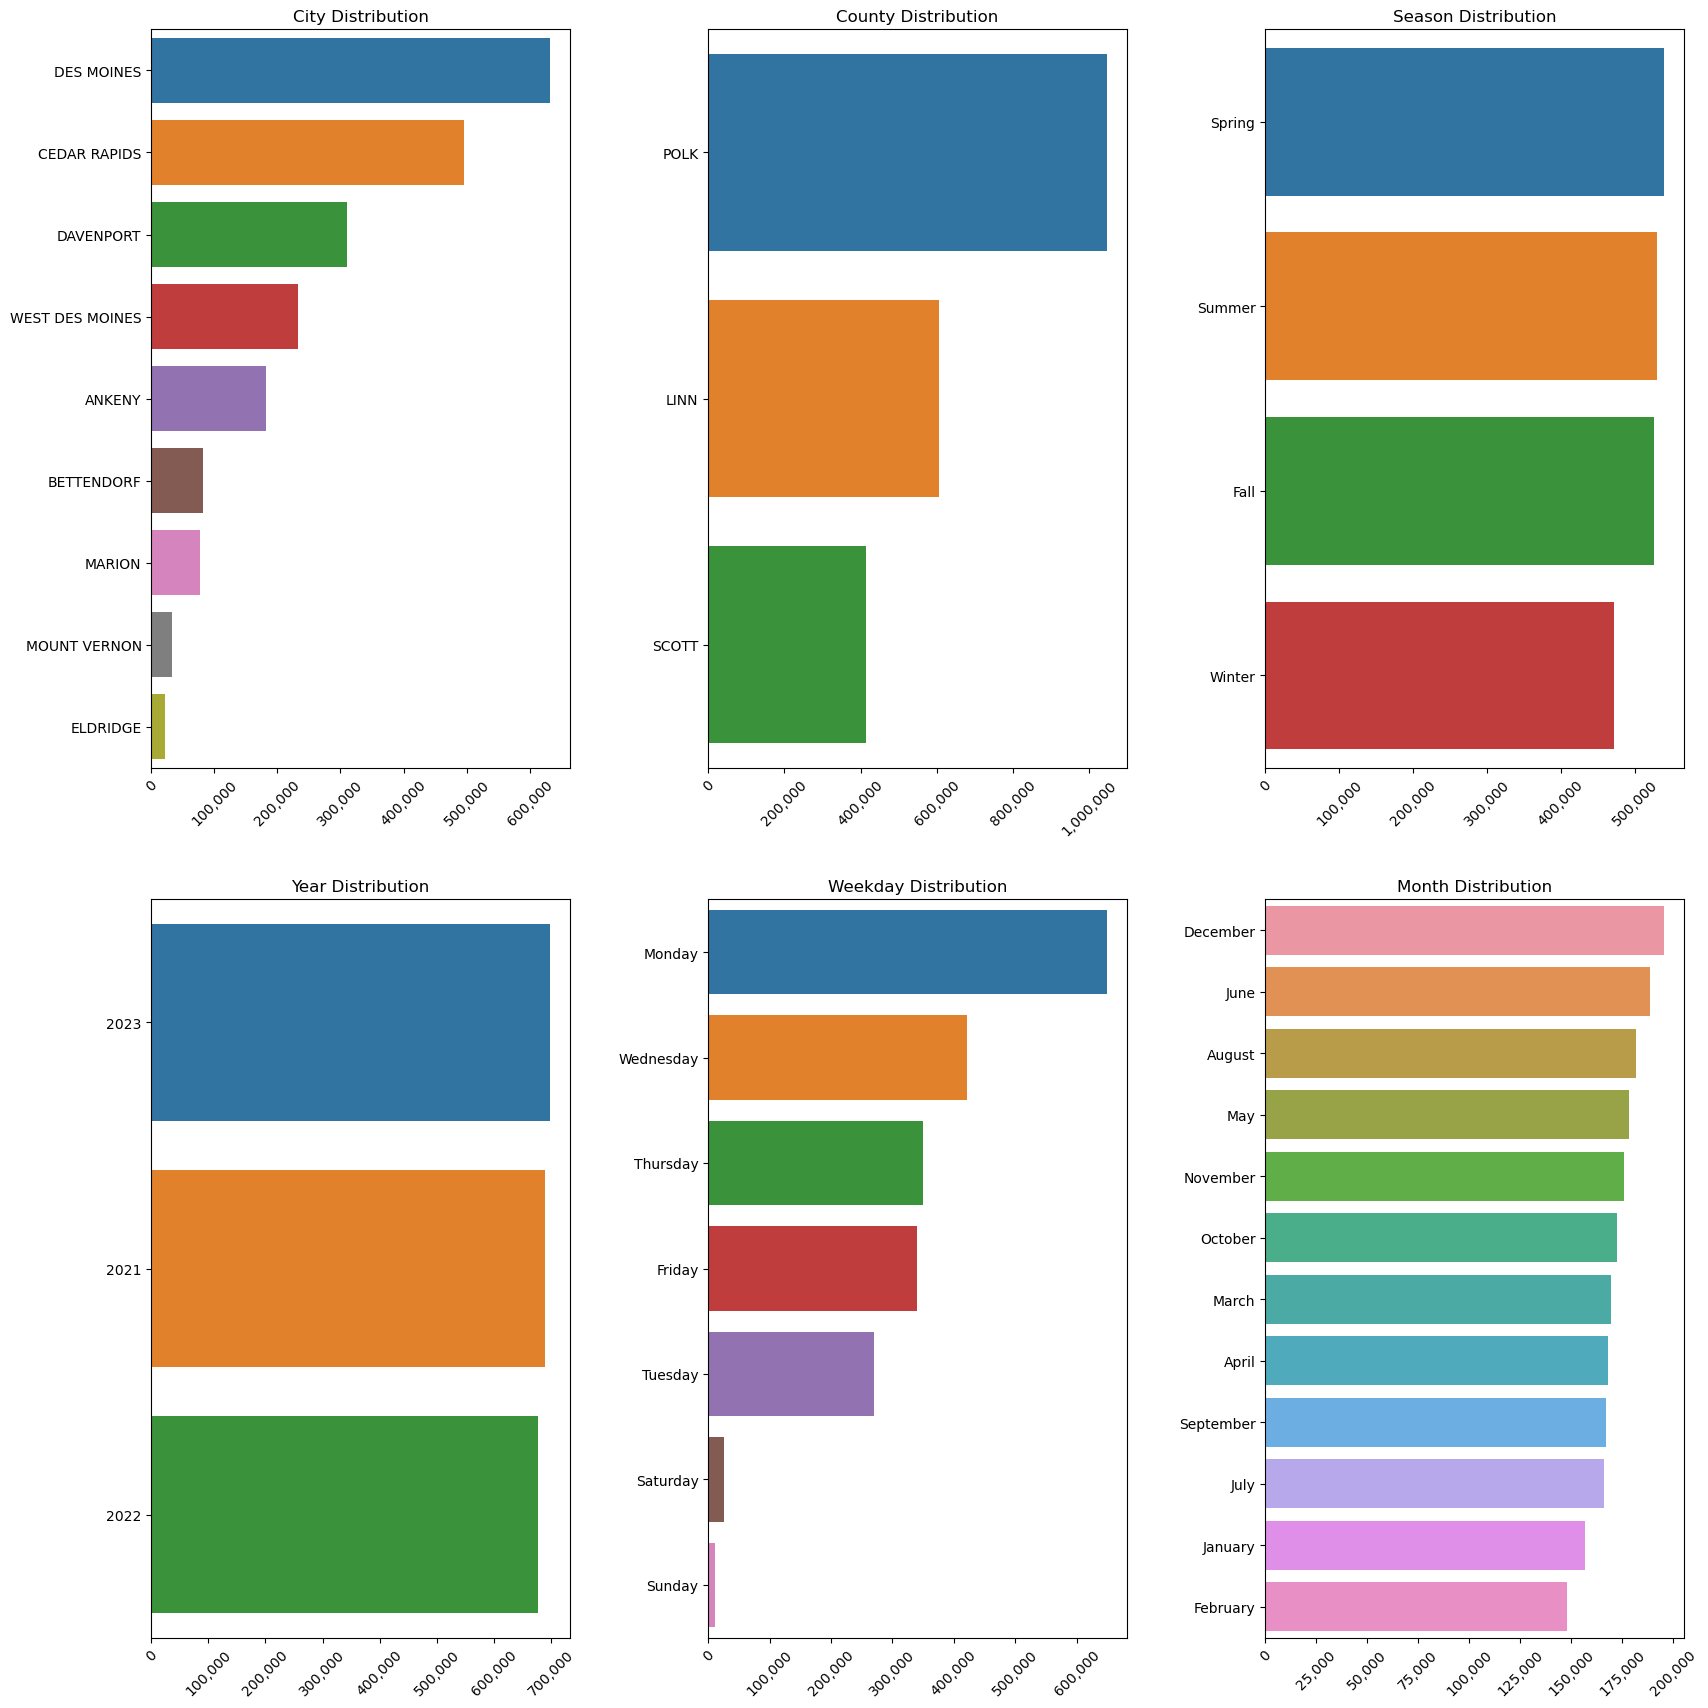

In [12]:
# Setting up the figure for multiple plots with increased height
fig, axes = plt.subplots(2, 3, figsize=(18, 18))  # Increased figure size

def create_count_plot(column, ax, title, rotation=0):
    # Create the plot
    plot = sns.countplot(y=top_cities_counties[column], order=top_cities_counties[column].value_counts().index, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Format y-axis to show full numbers (avoiding abbreviations)
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    # Rotate x-axis labels if specified
    if rotation:
        ax.tick_params(axis='x', rotation=rotation)

# Creating the plots
create_count_plot('city', axes[0, 0], 'City Distribution', rotation=45)
create_count_plot('county', axes[0, 1], 'County Distribution',rotation=45)
create_count_plot('season', axes[0, 2], 'Season Distribution',rotation=45)
create_count_plot('year', axes[1, 0], 'Year Distribution', rotation=45)
create_count_plot('weekday', axes[1, 1], 'Weekday Distribution', rotation=45)
create_count_plot('month', axes[1, 2], 'Month Distribution', rotation=45)

# Adjusting the layout to prevent overlapping
plt.tight_layout(pad=4.0, w_pad=3.0, h_pad=3.0)

# Show the plots
plt.show()

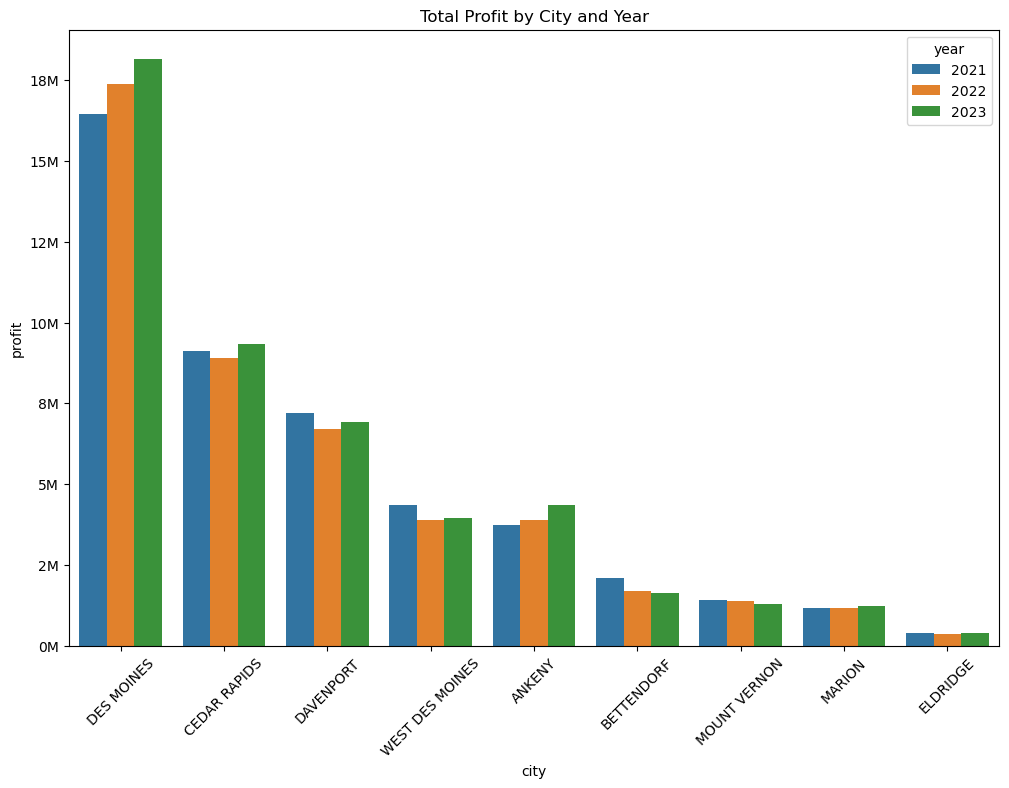

In [13]:
# Group by 'city' and 'year', sum 'profit', and sort by 'profit'
profit_city = top_cities_counties[['city', 'profit', 'year']].groupby(['city', 'year']).sum('profit').sort_values('profit', ascending=False).reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=profit_city, x='city', y='profit', hue='year')

# Add title and adjust x-ticks
plt.title('Total Profit by City and Year')
plt.xticks(rotation=45)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:,.0f}M'))

# Display the plot
plt.show()


## Summary and Recommendations

The analysis of liquor sales in Iowa over the past three calendar years shows that Polk, Linn, and Scott counties generated the highest revenue. Within Polk County, the top three cities by sales are Des Moines, West Des Moines, and Ankeny. In Linn County, Cedar Rapids, Mount Vernon, and Marion led in sales, while in Scott County, Davenport, Bettendorf, and Eldridge were the top performers.

Des Moines recorded the highest order volume, surpassing 600,000 orders. Cedar Rapids followed with just under 500,000 orders. On a county level, Polk County led with approximately 1 million orders, outpacing Linn and Scott counties.

Seasonal analysis revealed that winter sales were significantly lower compared to other times of the year. In contrast, yearly sales data showed 2023 leading in total orders, followed closely by 2021 and 2022. Sales peaked on Mondays and Wednesdays, with weekends showing fewer orders, possibly due to liquor laws or cultural practices. December emerged as the highest-performing month, likely due to holiday celebrations, with strong sales also seen in the summer months.

To capitalize on these trends, I recommend focusing marketing efforts in Polk County, where sales are the highest. Introduce targeted promotions during the winter to address the seasonal dip in sales. Additionally, strengthen holiday and summer marketing campaigns, as these periods consistently drive the highest sales due to festivities and warmer weather. Adjust inventory and staffing to meet the increased demand during these peak periods to ensure efficient service and adequate supply.

